In [311]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [312]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [414]:
df = pd.read_csv("../Python/Output/PolyNearOne.txt", sep='\t')
df.head()

,X,Order,Value Error,Uncertainty,Power,Reminder,Rouding Error,Accumulated Rounding Error,Result ULP,ULP Power,Decrease,ULP Reminder
0,0.1,1,-0.009091,6.509259e-17,0.100,-0.009091,-0.100,2.775558e-17,1.110223e-16,0.100,-0.10000,-0.009091
1,-0.1,1,-0.011111,1.286973e-16,0.100,-0.011111,-0.100,8.326673e-17,2.220446e-16,0.100,-0.00202,-0.011111
2,0.1,2,0.000909,6.492255e-17,0.010,0.000909,0.010,3.469447e-17,1.110223e-16,0.010,0.01000,0.000909
3,-0.1,2,-0.001111,1.288109e-16,0.010,-0.001111,-0.010,9.020562e-17,2.220446e-16,0.010,-0.00202,-0.001111
4,0.1,3,-0.000091,6.494684e-17,0.001,-0.000091,-0.001,3.404395e-17,1.110223e-16,0.001,-0.00100,-0.000091


In [426]:
def PlotReminderUncertainty(minOrder=0, maxOrder=125, ylim=[], showUncertainty=False):
    fig, ax = plt.subplots()
    ax.set_title(r'Taylor Expansion Reminders for $\frac{1}{1 - x}$')
    ax.set_xlabel('Taylor Expansion Order N')
    ax.set_ylabel('Absolute Reminder')
    ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)

    for x, color, sUlp in zip((0.6, 0.7, -0.6, -0.7), ('g', 'b', 'm', 'c'), [(75, 80, 85), (105, 110, 115)]*2):   
        dfPlot = df[(df['X']==x) & (df['Order']>=minOrder) & (df['Order']<=maxOrder) & (df['Order'].isin(sUlp))]
        ax.plot(dfPlot['Order'], dfPlot['Result ULP'], color+'o', label=f'{x} Result LSV')
        if not showUncertainty:
            ax.plot(dfPlot['Order'], dfPlot['Result ULP']*0.5, color+'x', label=f'{x} 1/2 Result LSV')
        dfPlot = df[(df['X']==x) & (df['Order']>=minOrder) & (df['Order']<=maxOrder)]
        ax.plot(dfPlot['Order'], np.abs(dfPlot['Reminder']), color+'-', label=f'{x} Absolute Reminder')
        if showUncertainty:
            ax.plot(dfPlot['Order'], dfPlot['Uncertainty'], color+'-.', label=f'{x} Uncertainty')
        else:
            if x < 0:
                ax.plot(dfPlot['Order'], dfPlot['Power'], color+'--', label=f'{x} $|x|^N$')
            ax.plot(dfPlot['Order'], np.abs(dfPlot['Accumulated Rounding Error']), color+':', 
                    label=f'{x} Accumulated Rounding Error')
        
    ax.legend(bbox_to_anchor=(1.0, 1.0))

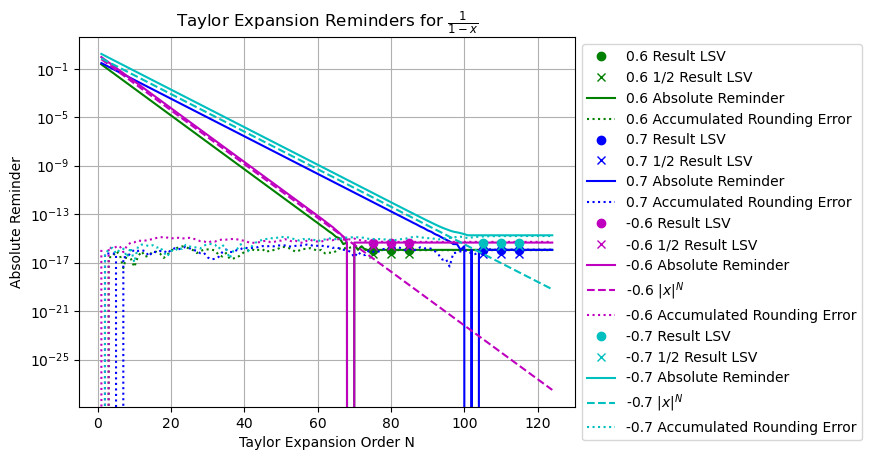

In [427]:
PlotReminderUncertainty()

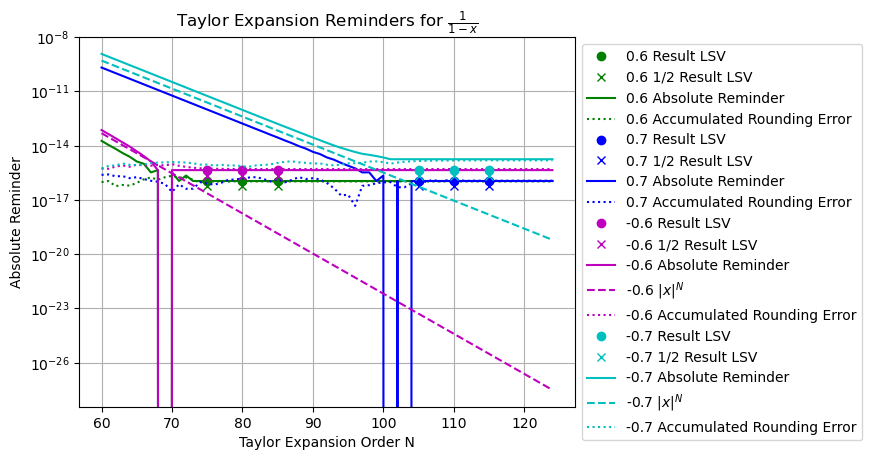

In [428]:
PlotReminderUncertainty(minOrder=60)

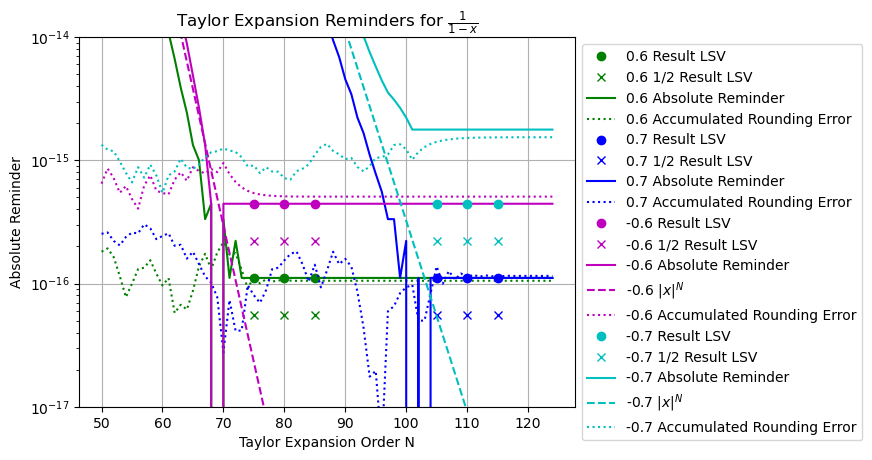

In [435]:
PlotReminderUncertainty(minOrder=50, ylim=(1e-17,1e-14))

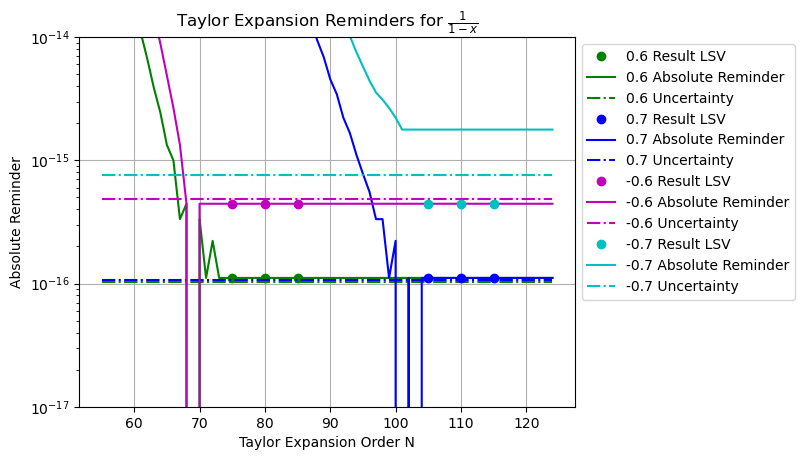

In [434]:
PlotReminderUncertainty(minOrder=55, ylim=(1e-17,1e-14), showUncertainty=True)

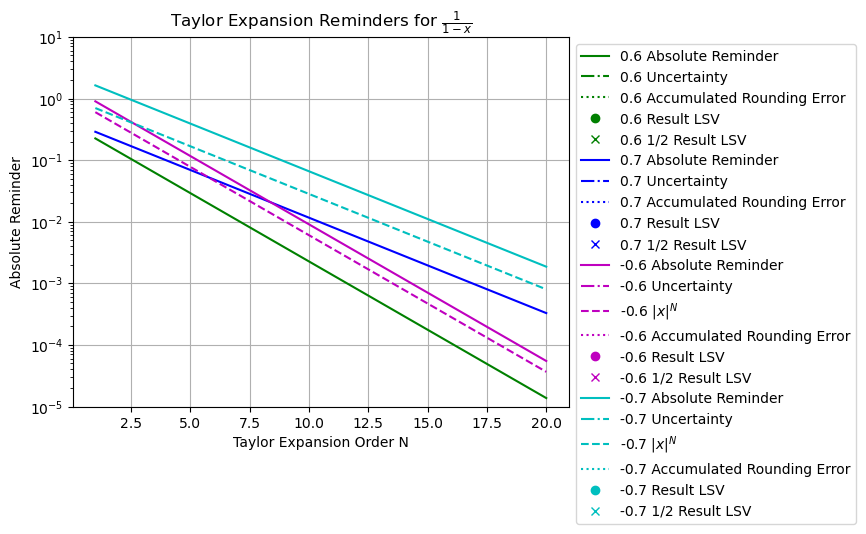

In [420]:
PlotReminderUncertainty(maxOrder=20, ylim=(1e-5, 10))

# Reach the end

In [319]:
df[(df['X']==0.6) & (df['Order']>=65) & (df['Order']<=75)].head(10)

,X,Order,Value Error,Uncertainty,Power,Reminder,Reminder ULP,ULP Power,ULP Reminder
1380,0.6,65,1.332268e-15,1.023457e-16,3.800417e-15,-1.332268e-15,1.110223e-16,3.774758e-15,1.332268e-15
1382,0.6,66,9.992007e-16,1.023457e-16,2.280250e-15,9.992007e-16,1.110223e-16,2.275957e-15,9.992007e-16
1384,0.6,67,3.330669e-16,1.023457e-16,1.368150e-15,-3.330669e-16,1.110223e-16,1.387779e-15,3.330669e-16
1386,0.6,68,4.440892e-16,1.023457e-16,8.208901e-16,4.440892e-16,1.110223e-16,8.326673e-16,4.440892e-16
1388,0.6,69,0.000000e+00,1.023457e-16,4.925341e-16,0.000000e+00,1.110223e-16,4.996004e-16,0.000000e+00
1390,0.6,70,3.330669e-16,1.023457e-16,2.955204e-16,3.330669e-16,1.110223e-16,2.775558e-16,3.330669e-16
1392,0.6,71,1.110223e-16,1.023457e-16,1.773123e-16,1.110223e-16,1.110223e-16,1.665335e-16,1.110223e-16
1394,0.6,72,2.220446e-16,1.023457e-16,1.063874e-16,2.220446e-16,1.110223e-16,1.110223e-16,2.220446e-16
1396,0.6,73,1.110223e-16,1.023457e-16,6.383242e-17,1.110223e-16,1.110223e-16,5.551115e-17,1.110223e-16
1398,0.6,74,1.110223e-16,1.023457e-16,3.829945e-17,1.110223e-16,1.110223e-16,5.551115e-17,1.110223e-16


In [320]:
df[(df['X']==0.7) & (df['Order']>=100) & (df['Order']<=106)].head(10)

,X,Order,Value Error,Uncertainty,Power,Reminder,Reminder ULP,ULP Power,ULP Reminder
1700,0.7,100,2.220446e-16,1.069968e-16,3.234477e-16,2.220446e-16,1.110223e-16,3.330669e-16,2.220446e-16
1702,0.7,101,0.000000e+00,1.069968e-16,2.264134e-16,0.000000e+00,1.110223e-16,2.220446e-16,0.000000e+00
1704,0.7,102,1.110223e-16,1.069968e-16,1.584893e-16,1.110223e-16,1.110223e-16,1.665335e-16,1.110223e-16
1706,0.7,103,0.000000e+00,1.069968e-16,1.109425e-16,0.000000e+00,1.110223e-16,1.110223e-16,0.000000e+00
1708,0.7,104,1.110223e-16,1.069968e-16,7.765978e-17,1.110223e-16,1.110223e-16,5.551115e-17,1.110223e-16
1710,0.7,105,1.110223e-16,1.069968e-16,5.436185e-17,1.110223e-16,1.110223e-16,5.551115e-17,1.110223e-16
1712,0.7,106,1.110223e-16,1.069968e-16,3.805329e-17,1.110223e-16,1.110223e-16,5.551115e-17,1.110223e-16


In [321]:
df[(df['X']==-0.6) & (df['Order']>=63) & (df['Order']<=73)].head(10)

,X,Order,Value Error,Uncertainty,Power,Reminder,Reminder ULP,ULP Power,ULP Reminder
1377,-0.6,63,1.509903e-14,4.816320e-16,1.055671e-14,-1.509903e-14,4.440892e-16,1.065814e-14,1.509903e-14
1379,-0.6,64,8.881784e-15,4.816320e-16,6.334029e-15,-8.881784e-15,4.440892e-16,6.439294e-15,8.881784e-15
1381,-0.6,65,4.884981e-15,4.816320e-16,3.800417e-15,-4.884981e-15,4.440892e-16,3.774758e-15,4.884981e-15
1383,-0.6,66,2.664535e-15,4.816320e-16,2.280250e-15,-2.664535e-15,4.440892e-16,2.220446e-15,2.664535e-15
1385,-0.6,67,1.332268e-15,4.816320e-16,1.368150e-15,-1.332268e-15,4.440892e-16,1.332268e-15,1.332268e-15
1387,-0.6,68,4.440892e-16,4.816320e-16,8.208901e-16,-4.440892e-16,4.440892e-16,8.881784e-16,4.440892e-16
1389,-0.6,69,0.000000e+00,4.816320e-16,4.925341e-16,0.000000e+00,4.440892e-16,4.440892e-16,0.000000e+00
1391,-0.6,70,4.440892e-16,4.816320e-16,2.955204e-16,4.440892e-16,4.440892e-16,2.220446e-16,4.440892e-16
1393,-0.6,71,4.440892e-16,4.816320e-16,1.773123e-16,4.440892e-16,4.440892e-16,2.220446e-16,4.440892e-16
1395,-0.6,72,4.440892e-16,4.816320e-16,1.063874e-16,4.440892e-16,4.440892e-16,0.000000e+00,4.440892e-16


In [404]:
df[(df['X']==-0.7) & (df['Order']>=95) & (df['Order']<=105)].head(10)

,X,Order,Value Error,Uncertainty,Power,Reminder,Rounding Error,Accumulated Rounding Error,Result ULP,ULP Power,ULP Reminder
1677,-0.7,95,-5.773160e-15,7.614589e-16,1.924482e-15,-5.773160e-15,-1.481249e-16,-1.223557e-15,4.440892e-16,1.998401e-15,-5.773160e-15
1679,-0.7,96,-4.440892e-15,7.614589e-16,1.347137e-15,-4.440892e-15,-1.486961e-17,-1.238427e-15,4.440892e-16,1.332268e-15,-4.440892e-15
1681,-0.7,97,-3.552714e-15,7.614589e-16,9.429961e-16,-3.552714e-15,-5.481765e-17,-1.293244e-15,4.440892e-16,8.881784e-16,-3.552714e-15
1683,-0.7,98,-3.108624e-15,7.614589e-16,6.600972e-16,-3.108624e-15,-2.160080e-16,-1.509252e-15,4.440892e-16,6.661338e-16,-3.108624e-15
1685,-0.7,99,-2.664535e-15,7.614589e-16,4.620681e-16,-2.664535e-15,-1.797886e-17,-1.527231e-15,4.440892e-16,4.440892e-16,-2.664535e-15
1687,-0.7,100,-2.220446e-15,7.614589e-16,3.234477e-16,-2.220446e-15,1.206416e-16,-1.406590e-15,4.440892e-16,2.220446e-16,-2.220446e-15
1689,-0.7,101,-1.776357e-15,7.614589e-16,2.264134e-16,-1.776357e-15,2.176759e-16,-1.188914e-15,4.440892e-16,2.220446e-16,-1.776357e-15
1691,-0.7,102,-1.776357e-15,7.614589e-16,1.584893e-16,-1.776357e-15,-1.584893e-16,-1.347403e-15,4.440892e-16,2.220446e-16,-1.776357e-15
1693,-0.7,103,-1.776357e-15,7.614589e-16,1.109425e-16,-1.776357e-15,-1.109425e-16,-1.458346e-15,4.440892e-16,0.000000e+00,-1.776357e-15
1695,-0.7,104,-1.776357e-15,7.614589e-16,7.765978e-17,-1.776357e-15,-7.765978e-17,-1.536006e-15,4.440892e-16,0.000000e+00,-1.776357e-15


In [431]:
df[(df['X']==-0.7) & (df['Order']>=95) & (df['Order']<=105)]\
    [['Order', 'Power', 'ULP Power', 'Decrease', 'Reminder', 'Accumulated Rounding Error']].head(100)

,Order,Power,ULP Power,Decrease,Reminder,Accumulated Rounding Error
1677,95,1.924482e-15,1.776357e-15,-4.996004e-15,-5.773160e-15,-1.045807e-15
1679,96,1.347137e-15,1.332268e-15,-4.996004e-15,-4.440892e-15,-1.060677e-15
1681,97,9.429961e-16,8.881784e-16,-3.219647e-15,-3.552714e-15,-1.115494e-15
1683,98,6.600972e-16,4.440892e-16,-3.441691e-15,-3.108624e-15,-1.331502e-15
1685,99,4.620681e-16,4.440892e-16,-2.553513e-15,-2.664535e-15,-1.349481e-15
1687,100,3.234477e-16,4.440892e-16,-2.442491e-15,-2.220446e-15,-1.228840e-15
1689,101,2.264134e-16,4.440892e-16,-1.776357e-15,-1.776357e-15,-1.011164e-15
1691,102,1.584893e-16,0.000000e+00,-1.887379e-15,-1.776357e-15,-1.169653e-15
1693,103,1.109425e-16,0.000000e+00,-1.776357e-15,-1.776357e-15,-1.280596e-15
1695,104,7.765978e-17,0.000000e+00,-1.887379e-15,-1.776357e-15,-1.358255e-15


In [ ]:
dfBad = 